In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''Primera vista a los datos'''

'Primera vista a los datos'

In [3]:
df = pd.read_csv('nuevo_acumulado_hechos_de_transito_2023_12.csv')
df.head()

/tmp/ipykernel_33726/3229477269.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('nuevo_acumulado_hechos_de_transito_2023_12.csv')


,fecha_evento,hora_evento,tipo_evento,fecha_captura,folio,latitud,longitud,punto_1,punto_2,colonia,...,clasificacion_de_la_vialidad,sentido_de_circulacion,dia,prioridad,origen,unidad_medica_de_apoyo,matricula_unidad_medica,trasladado_lesionados,personas_fallecidas,personas_lesionadas
0,2020-04-06,12:50:00,CHOQUE,2020-04-17,BJ/200406/03499,19.368116,-99.142903,EJE 7 SUR,ANTILLAS,PORTALES NTE,...,EJE VIAL,P-O,Lunes,BAJA,RADIO,PC,NaN,NO,0,1
1,2020-04-06,18:31:00,CHOQUE,2020-04-17,C5/200406/05748,19.301142,-99.115521,CALZ DEL HUESO,RANCHO COLORADO,COAPA STA CECILIA,...,VIA PRIMARIA,O-P,Lunes,BAJA,911 CDMX,ERUM,NaN,NO,0,1
2,2020-04-06,18:39:00,CHOQUE,2020-04-17,C5/200406/05802,19.476843,-99.092207,EJE 5 NTE,AV GRAN CANAL DEL DESAGUE,JOSE MA MORELOS Y PAVON,...,EJE VIAL,P-O,Lunes,BAJA,911 CDMX,PARTICULAR,NaN,NO,0,1
3,2020-04-06,11:38:00,DERRAPADO,2020-04-17,IZ/200406/03058,19.298474,-98.984670,EJE 10 SUR,AV SAN FCO,SAN FCO TLALTENCO,...,EJE VIAL,NO-SP,Lunes,MEDIA,RADIO,PC,NaN,SI,0,1
4,2020-04-06,13:31:00,DERRAPADO,2020-04-17,C5/200406/03762,19.436170,-99.204754,AV HOMERO,SOFOCLES,LOS MORALES,...,VIA PRIMARIA,P-O,Lunes,BAJA,911 CDMX,SEGURO,NaN,NO,0,1


In [4]:
df.describe()

,latitud,longitud,zona_vial,personas_fallecidas,personas_lesionadas
count,1.340720e+05,134075.000000,134079.000000,134079.000000,134079.000000
mean,1.644903e+02,-99.128963,2.991169,0.019451,1.163411
std,5.313013e+04,1.045364,1.433062,0.149814,0.625307
min,-1.932720e+01,-99.999630,1.000000,0.000000,0.000000
25%,1.934367e+01,-99.172162,2.000000,0.000000,1.000000
50%,1.939407e+01,-99.138108,3.000000,0.000000,1.000000
75%,1.943895e+01,-99.098532,4.000000,0.000000,1.000000
max,1.945407e+07,99.218774,6.000000,10.000000,25.000000


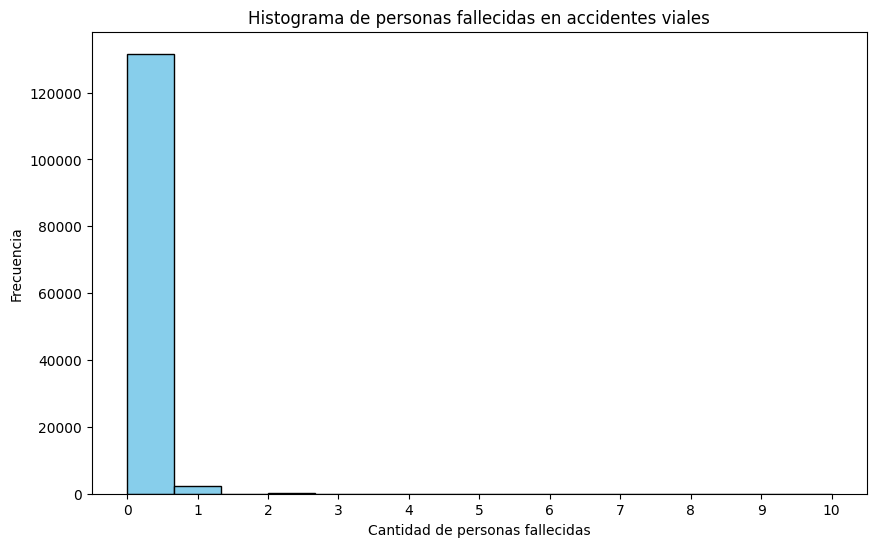

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(df['personas_fallecidas'], bins=15, color='skyblue', edgecolor='black')
plt.title('Histograma de personas fallecidas en accidentes viales')
plt.xlabel('Cantidad de personas fallecidas')
plt.ylabel('Frecuencia')

plt.xticks(range(int(df['personas_fallecidas'].min()), int(df['personas_fallecidas'].max())+1))
plt.show()

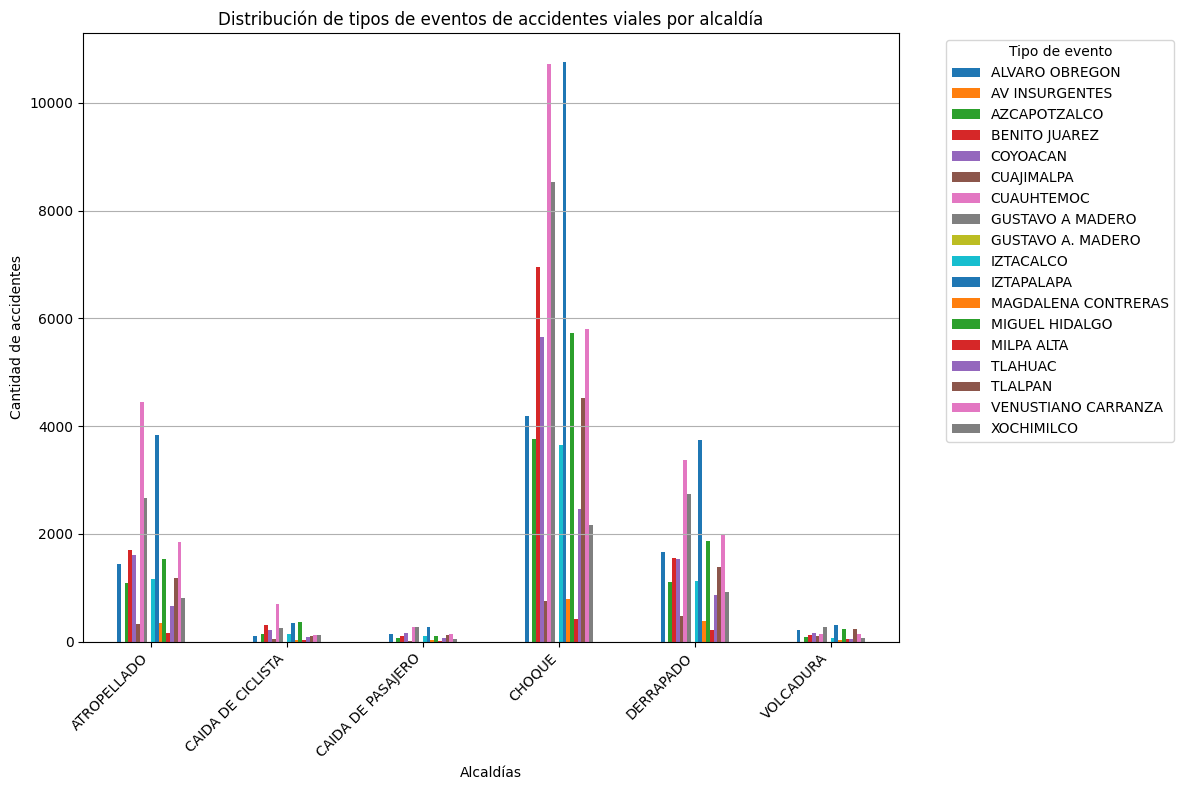

In [6]:
# datos por tipo de evento y alcaldía y contar la cantidad de accidentes en cada grupo
eventos_por_alcaldia = df.groupby(['tipo_evento', 'alcaldia']).size().unstack()

eventos_por_alcaldia.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title('Distribución de tipos de eventos de accidentes viales por alcaldía')
plt.xlabel('Alcaldías')
plt.ylabel('Cantidad de accidentes')
plt.legend(title='Tipo de evento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


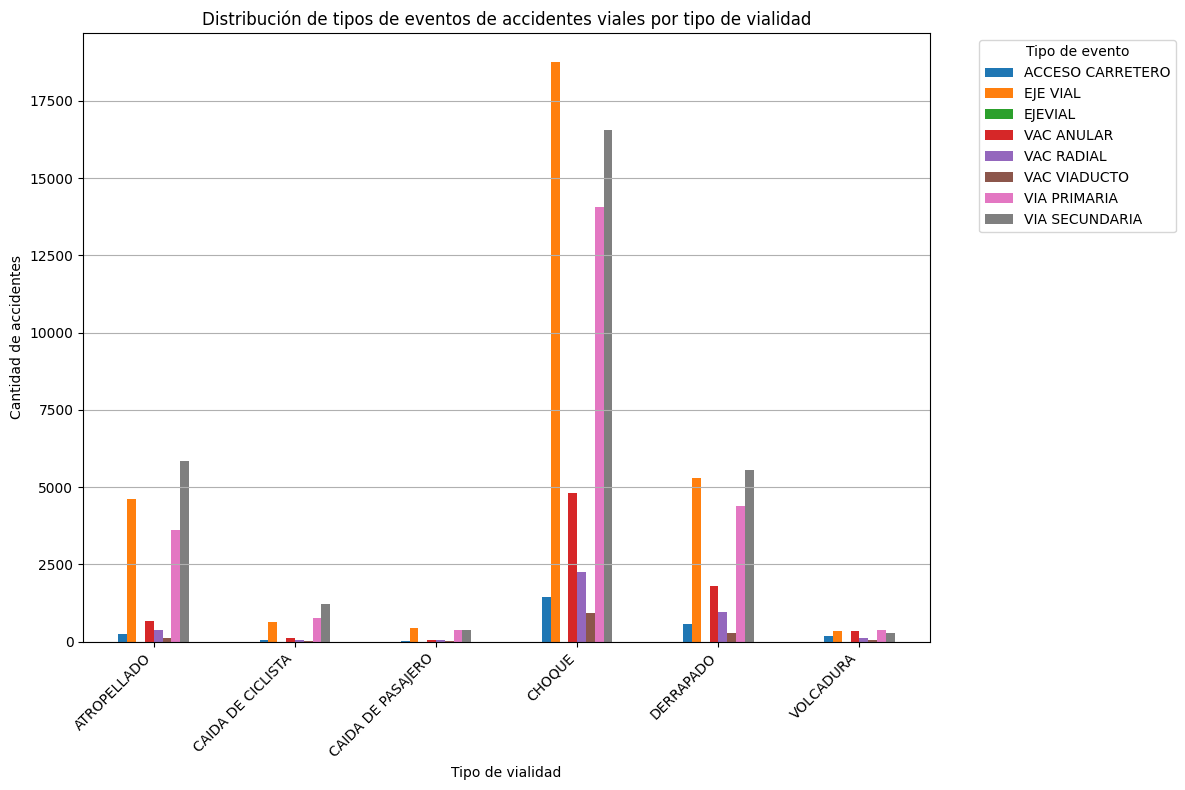

In [7]:
#choques por tipo de vialidad
eventos_por_vialidad = df.groupby(['tipo_evento', 'clasificacion_de_la_vialidad']).size().unstack()


eventos_por_vialidad.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title('Distribución de tipos de eventos de accidentes viales por tipo de vialidad')
plt.xlabel('Tipo de vialidad')
plt.ylabel('Cantidad de accidentes')
plt.legend(title='Tipo de evento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


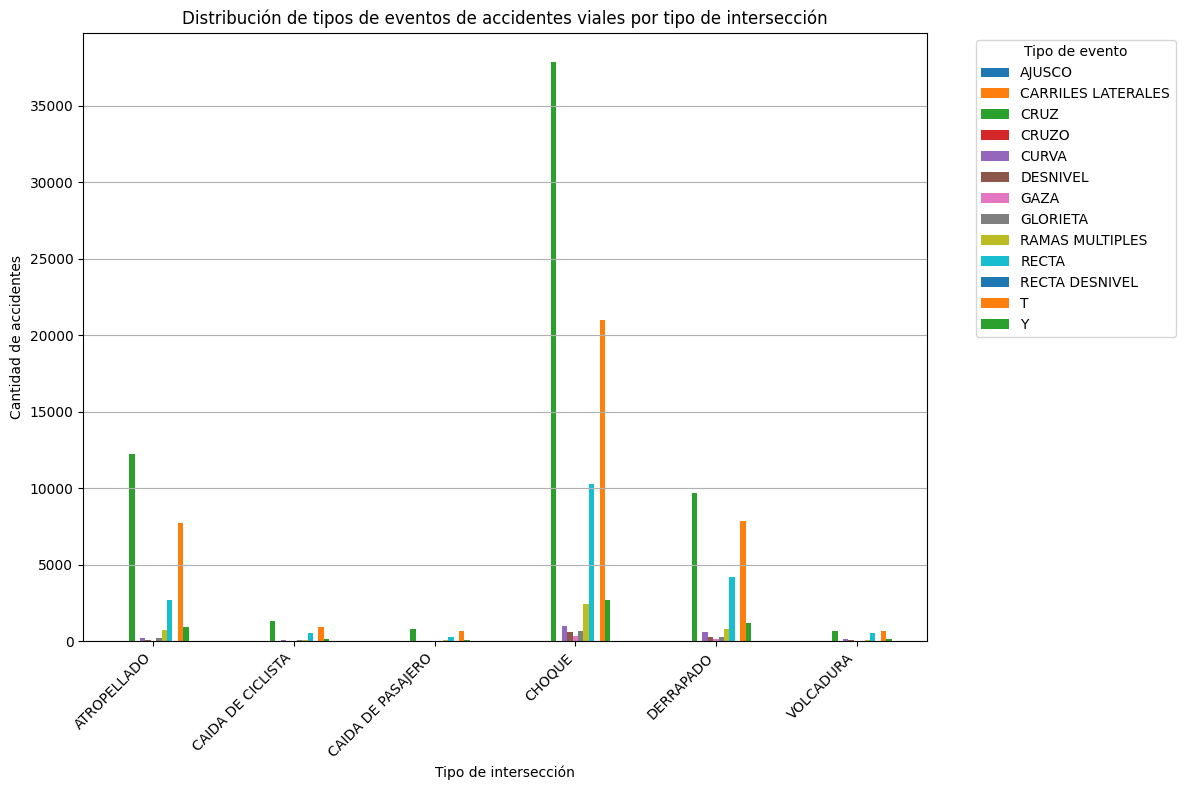

In [8]:
#accidentes por tipo de intersección
eventos_por_interseccion = df.groupby(['tipo_evento', 'tipo_de_interseccion']).size().unstack()


eventos_por_interseccion.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title('Distribución de tipos de eventos de accidentes viales por tipo de intersección')
plt.xlabel('Tipo de intersección')
plt.ylabel('Cantidad de accidentes')
plt.legend(title='Tipo de evento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [9]:
# Viendo estos resultados podemos decir un par de cosas, al menos es visible que la mayor cantidad de accidentes
#del tipo choque ocurren en intersecciones de cruz, en ejes viales, por otro lado aunque igual de importantes 
#son otros 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
datos = pd.read_csv('nuevo_acumulado_hechos_de_transito_2023_12.csv')


/tmp/ipykernel_33726/3341591786.py:6: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  datos = pd.read_csv('nuevo_acumulado_hechos_de_transito_2023_12.csv')


/tmp/ipykernel_33726/2664353261.py:5: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  datos = pd.read_csv('nuevo_acumulado_hechos_de_transito_2023_12.csv')


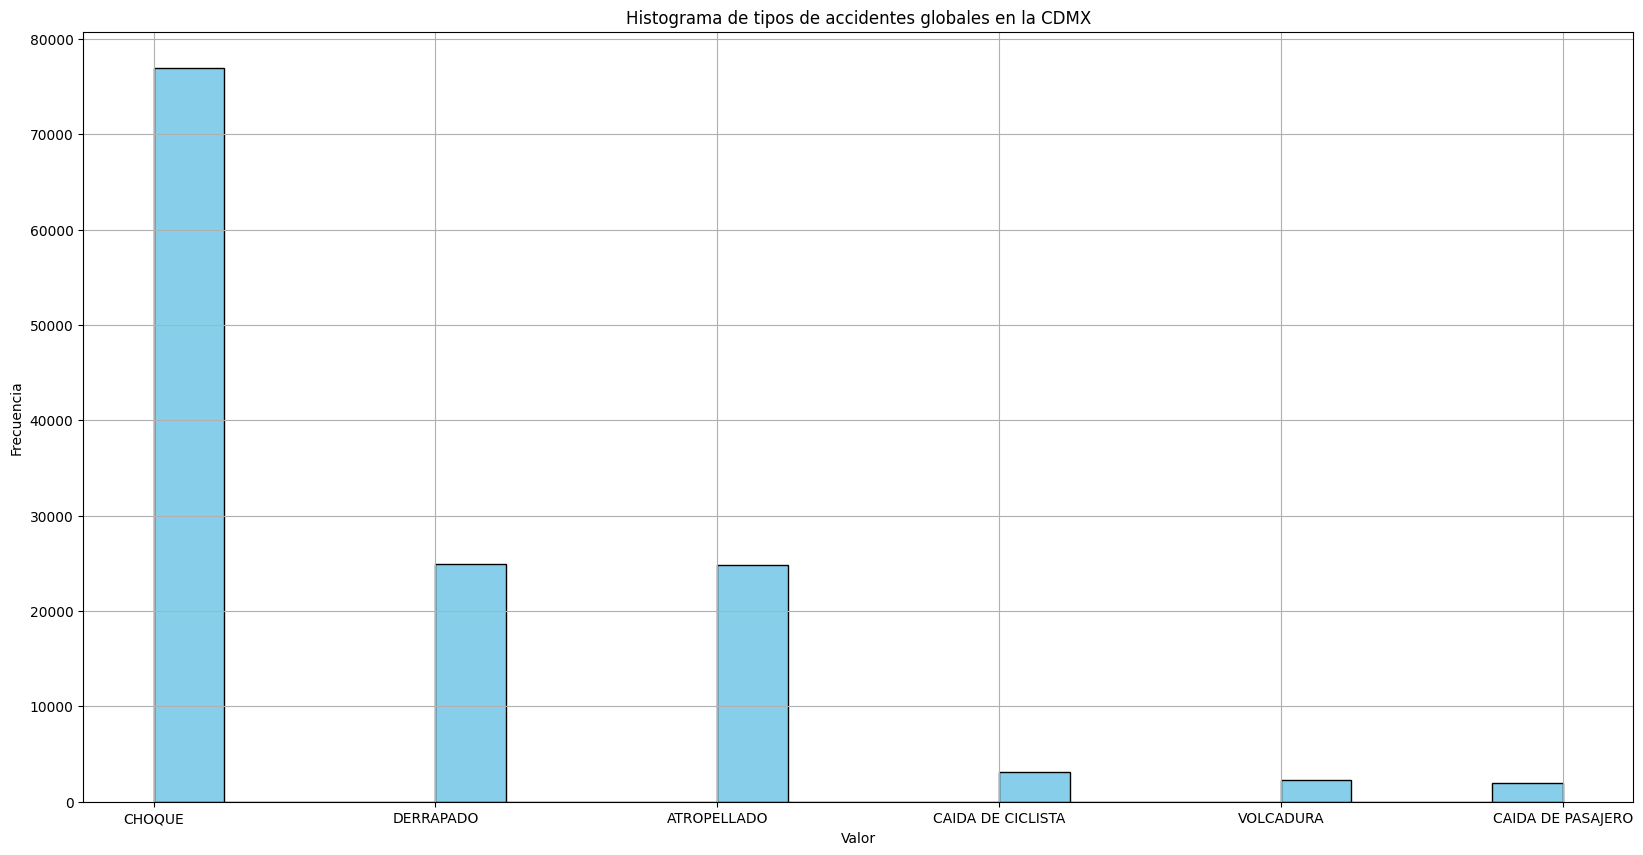

           Categoría  Frecuencia
0             CHOQUE       76907
1          DERRAPADO       24940
2        ATROPELLADO       24844
3  CAIDA DE CICLISTA        3151
4          VOLCADURA        2296
5  CAIDA DE PASAJERO        1941


In [11]:
import pandas as pd
import matplotlib.pyplot as plt


datos = pd.read_csv('nuevo_acumulado_hechos_de_transito_2023_12.csv')


plt.figure(figsize=(20,10))
plt.hist(datos['tipo_evento'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de tipos de accidentes globales en la CDMX')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()




tabla_frecuencias = datos['tipo_evento'].value_counts().reset_index()
tabla_frecuencias.columns = ['Categoría', 'Frecuencia']
print(tabla_frecuencias)


In [12]:
'''Inicio del proyecto, punto 1'''
#Este primer plot muestra en general los accidentes relacionados a la fecha en que ocurrieron a lo largo de los 4 años
#Abarco entonces los datos de toda la ciudad junta 

'Inicio del proyecto, punto 1'

/tmp/ipykernel_33726/4233050036.py:5: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('nuevo_acumulado_hechos_de_transito_2023_12.csv')


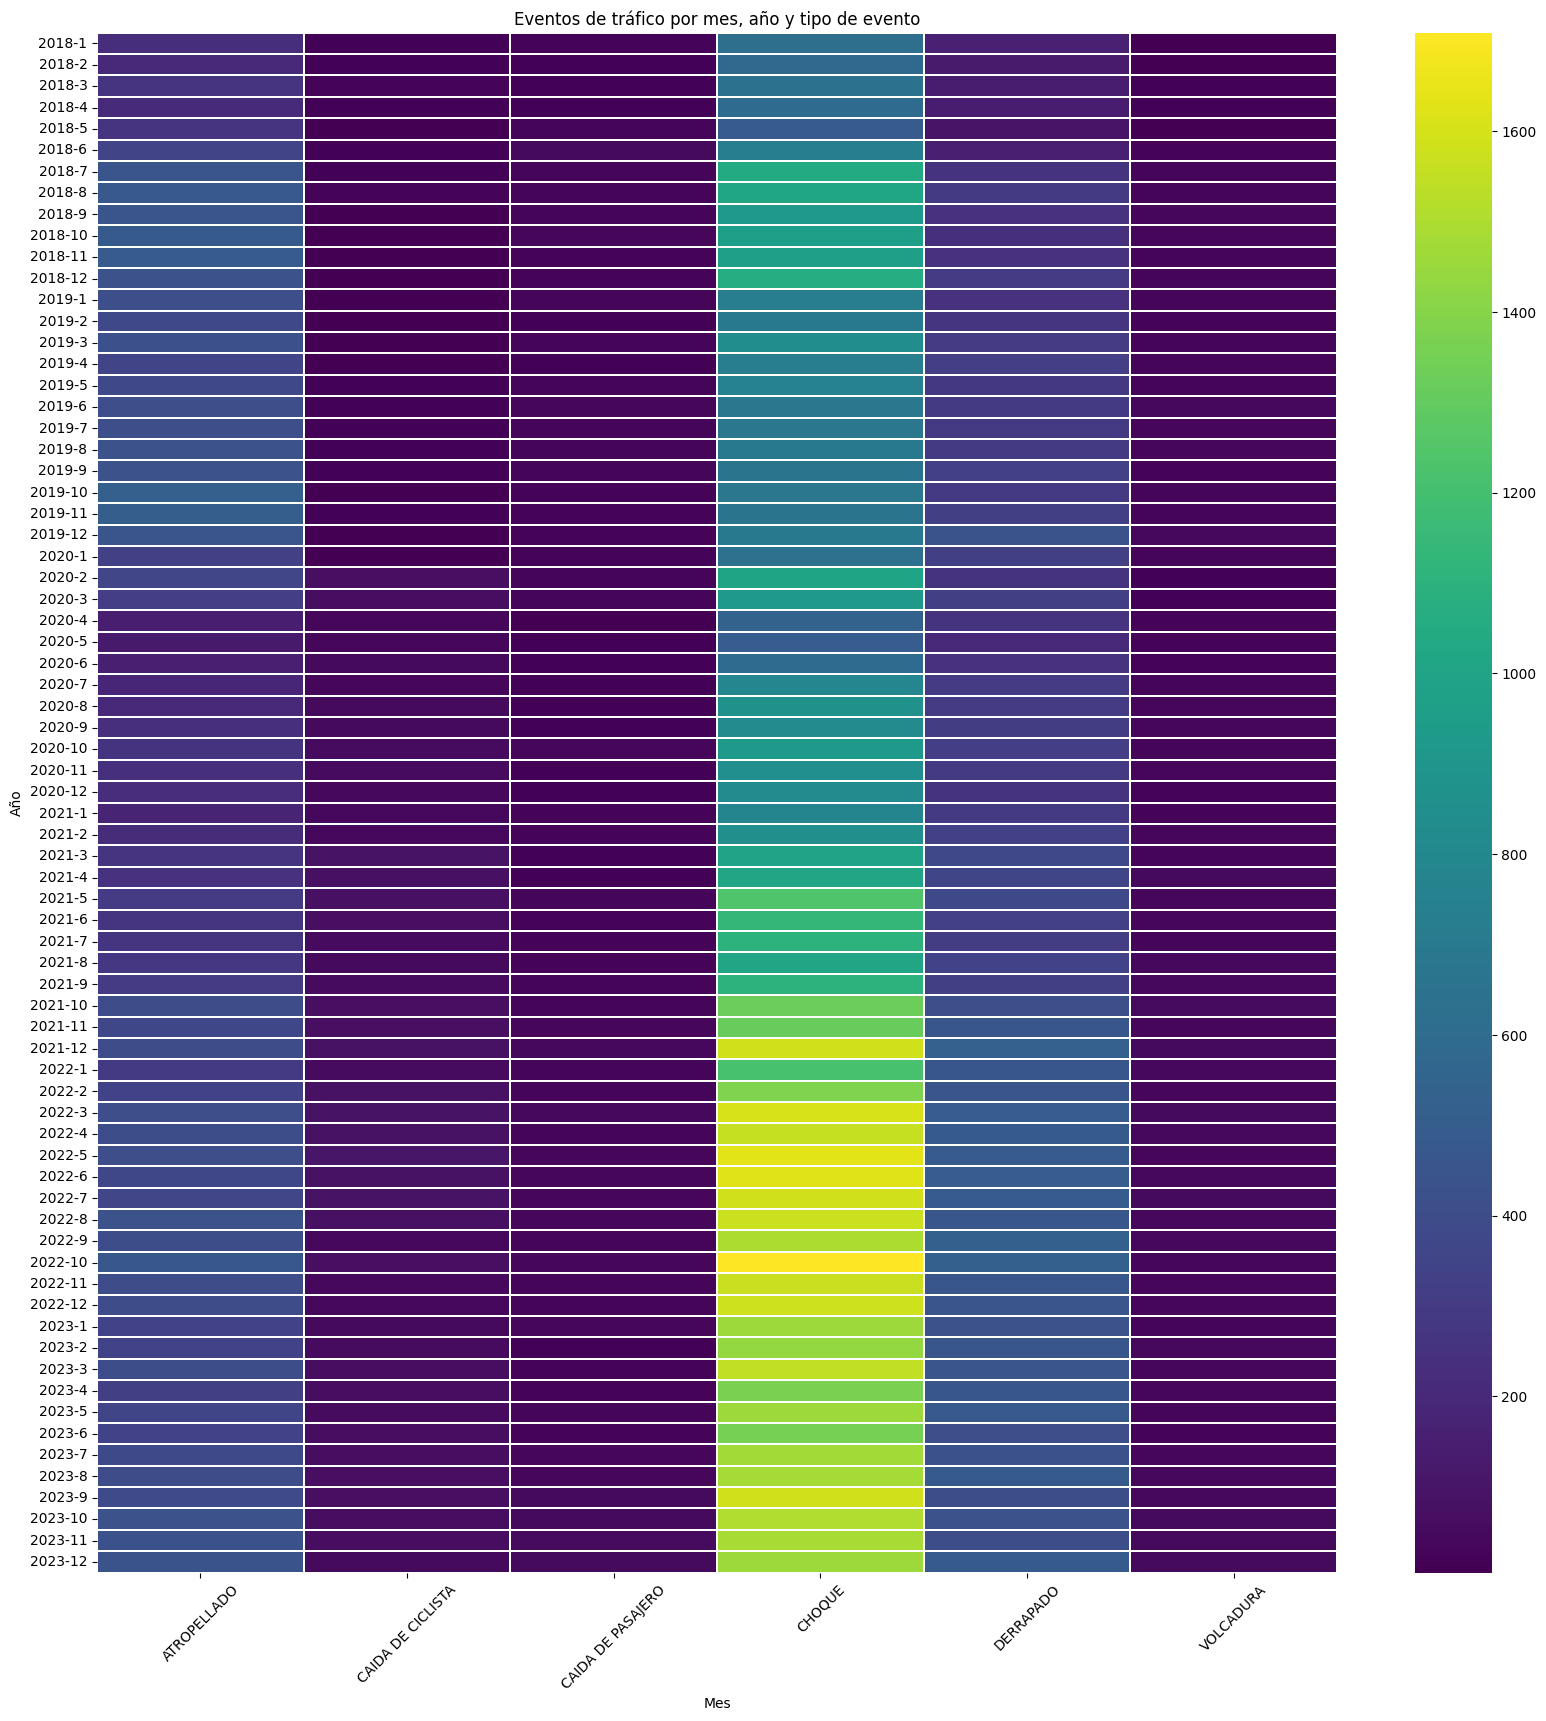

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('nuevo_acumulado_hechos_de_transito_2023_12.csv')

df['fecha_evento'] = pd.to_datetime(df['fecha_evento'])

df['mes'] = df['fecha_evento'].dt.month
df['año'] = df['fecha_evento'].dt.year

# Ordenar los años de forma ascendente
todos_los_años = sorted(df['año'].unique())

todos_los_meses = range(1, 13)  
meses_y_años_completos = [(año, mes) for año in todos_los_años for mes in todos_los_meses]

eventos_por_mes_año_tipo = df.groupby(['año', 'mes', 'tipo_evento']).size().unstack().reindex(meses_y_años_completos, fill_value=0)

plt.figure(figsize=(20, 20))
sns.heatmap(eventos_por_mes_año_tipo, cmap='viridis', linewidths=.1)
plt.title('Eventos de tráfico por mes, año y tipo de evento')
plt.xlabel('Mes')
plt.ylabel('Año')
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_33726/725262950.py:5: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('nuevo_acumulado_hechos_de_transito_2023_12.csv')


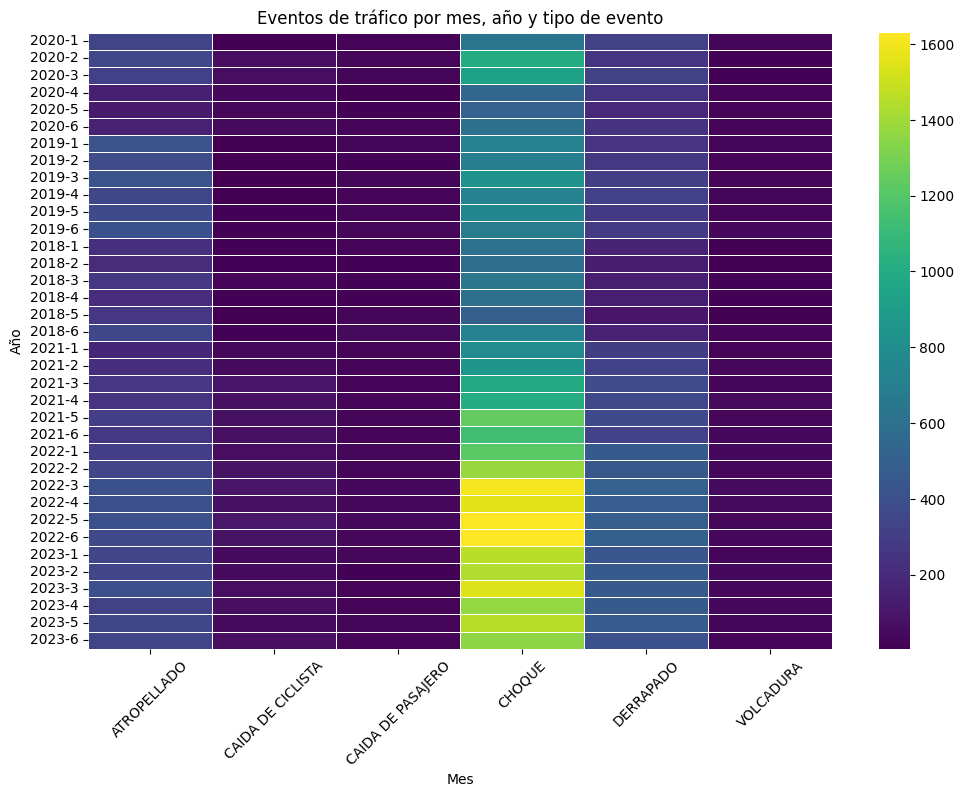

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('nuevo_acumulado_hechos_de_transito_2023_12.csv')

df['fecha_evento'] = pd.to_datetime(df['fecha_evento'])

df['mes'] = df['fecha_evento'].dt.month
df['año'] = df['fecha_evento'].dt.year

todos_los_meses = range(1,7)
todos_los_años = df['año'].unique()

meses_y_años_completos = [(año, mes) for año in todos_los_años for mes in todos_los_meses]

eventos_por_mes_año_tipo = df.groupby(['año', 'mes', 'tipo_evento']).size().unstack().reindex(meses_y_años_completos, fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(eventos_por_mes_año_tipo, cmap='viridis', linewidths=.5)
plt.title('Eventos de tráfico por mes, año y tipo de evento')
plt.xlabel('Mes')
plt.ylabel('Año')
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_33726/2860948512.py:5: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('nuevo_acumulado_hechos_de_transito_2023_12.csv')


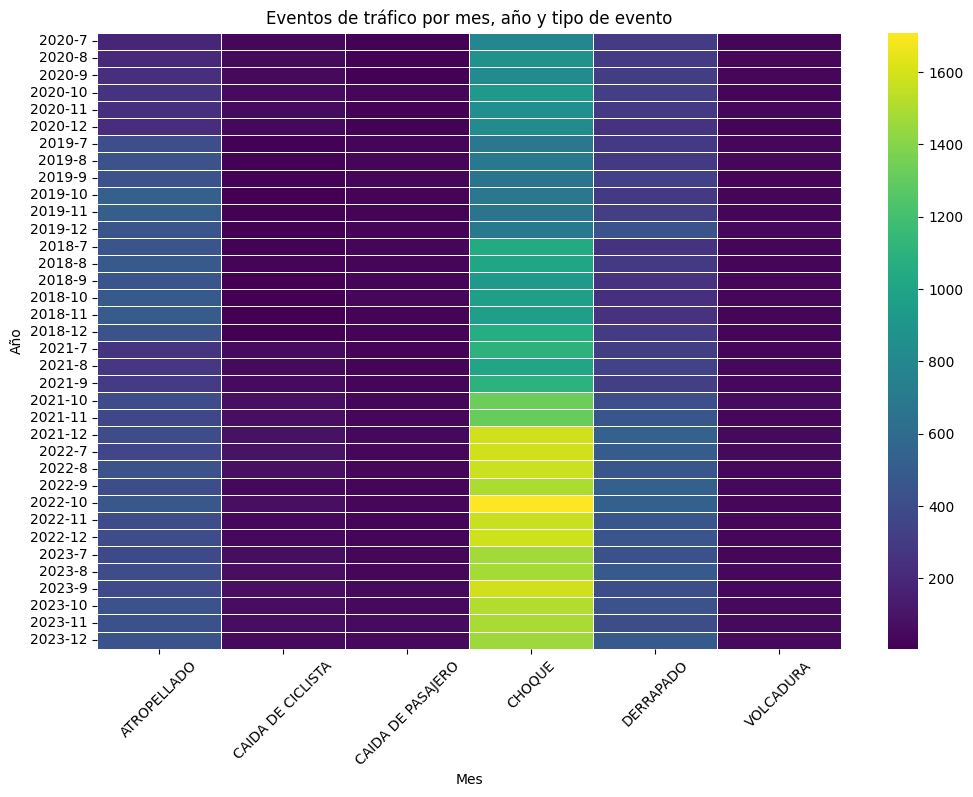

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('nuevo_acumulado_hechos_de_transito_2023_12.csv')

df['fecha_evento'] = pd.to_datetime(df['fecha_evento'])

df['mes'] = df['fecha_evento'].dt.month
df['año'] = df['fecha_evento'].dt.year

todos_los_meses = range(7,13)
todos_los_años = df['año'].unique()

meses_y_años_completos = [(año, mes) for año in todos_los_años for mes in todos_los_meses]

eventos_por_mes_año_tipo = df.groupby(['año', 'mes', 'tipo_evento']).size().unstack().reindex(meses_y_años_completos, fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(eventos_por_mes_año_tipo, cmap='viridis', linewidths=.5)
plt.title('Eventos de tráfico por mes, año y tipo de evento')
plt.xlabel('Mes')
plt.ylabel('Año')
plt.xticks(rotation=45)
plt.show()


In [16]:
#En el ejemplo anterior partí a la mitad la gráfica porque como son bastantes datos la gráfica tiende a saltarse meses para 
#mostrarse, entonces están divididos en dos, una con el primer semestre de cada año y la segunda con el segundo semestre de cada año.

In [17]:
'''Continuación del punto 1'''
#Analizar accidentes viales y el tipo de vialidad.

'Continuación del punto 1'

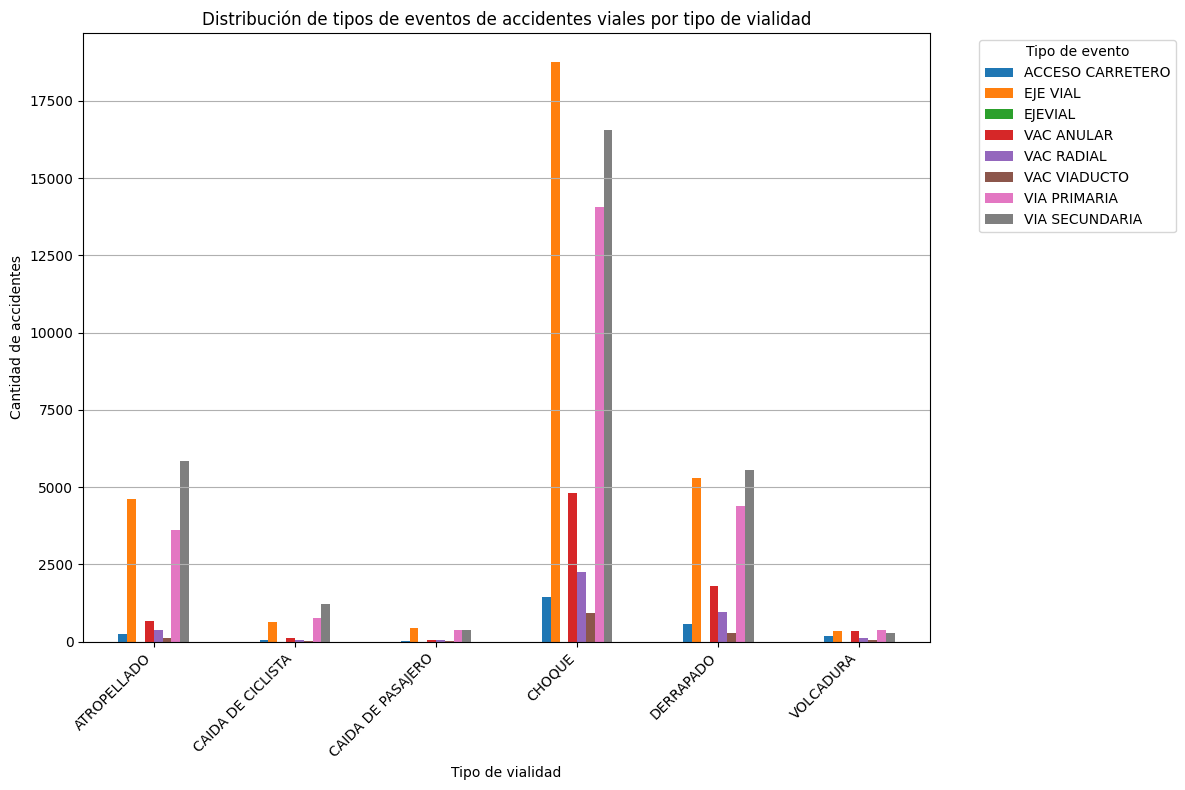

In [18]:
#choques por tipo de vialidad
eventos_por_vialidad = df.groupby(['tipo_evento', 'clasificacion_de_la_vialidad']).size().unstack()


eventos_por_vialidad.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title('Distribución de tipos de eventos de accidentes viales por tipo de vialidad')
plt.xlabel('Tipo de vialidad')
plt.ylabel('Cantidad de accidentes')
plt.legend(title='Tipo de evento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [19]:
df


,fecha_evento,hora_evento,tipo_evento,fecha_captura,folio,latitud,longitud,punto_1,punto_2,colonia,...,dia,prioridad,origen,unidad_medica_de_apoyo,matricula_unidad_medica,trasladado_lesionados,personas_fallecidas,personas_lesionadas,mes,año
0,2020-04-06,12:50:00,CHOQUE,2020-04-17,BJ/200406/03499,19.368116,-99.142903,EJE 7 SUR,ANTILLAS,PORTALES NTE,...,Lunes,BAJA,RADIO,PC,NaN,NO,0,1,4,2020
1,2020-04-06,18:31:00,CHOQUE,2020-04-17,C5/200406/05748,19.301142,-99.115521,CALZ DEL HUESO,RANCHO COLORADO,COAPA STA CECILIA,...,Lunes,BAJA,911 CDMX,ERUM,NaN,NO,0,1,4,2020
2,2020-04-06,18:39:00,CHOQUE,2020-04-17,C5/200406/05802,19.476843,-99.092207,EJE 5 NTE,AV GRAN CANAL DEL DESAGUE,JOSE MA MORELOS Y PAVON,...,Lunes,BAJA,911 CDMX,PARTICULAR,NaN,NO,0,1,4,2020
3,2020-04-06,11:38:00,DERRAPADO,2020-04-17,IZ/200406/03058,19.298474,-98.984670,EJE 10 SUR,AV SAN FCO,SAN FCO TLALTENCO,...,Lunes,MEDIA,RADIO,PC,NaN,SI,0,1,4,2020
4,2020-04-06,13:31:00,DERRAPADO,2020-04-17,C5/200406/03762,19.436170,-99.204754,AV HOMERO,SOFOCLES,LOS MORALES,...,Lunes,BAJA,911 CDMX,SEGURO,NaN,NO,0,1,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134074,2023-12-31,NaN,CHOQUE,2024-02-12,C5/20231231/04295,19.437376,-99.110431,EJE 1 NTE,ANFORA,PENITENCIARIA,...,Domingo,BAJA,RADIO,SAMU,676,NO,0,1,12,2023
134075,2023-12-31,NaN,CHOQUE,2024-02-09,C5/20231231/02787,19.399719,-99.150877,DR JOSE MA VERTIZ,ESPERANZA,NARVARTE OTE,...,Domingo,BAJA,LLAMADA DEL 911,SAMU,676,NO,0,1,12,2023
134076,2023-12-31,NaN,CHOQUE,2024-02-12,C5/20231231/01445,19.407470,-99.199970,AV CONSTITUYENTES,GRAL JOSE MA MENDIVIL,DANIEL GARZA,...,Domingo,MEDIA,LLAMADA DEL 911,PARTICULAR,PB03,SI,0,2,12,2023
134077,2023-12-31,NaN,CHOQUE,2024-02-12,C5/20231231/04116,19.439667,-99.207823,PRESA LA ANGOSTURA,PRESA COINTZIO,IRRIGACION,...,Domingo,BAJA,LLAMADA DEL 911,PC,6,NO,0,1,12,2023


In [20]:
#df_limpio = df.drop(["hora_evento","fecha_captura","folio","latitud","longitud","punto_1","punto_2","colonia","dia","prioridad","origen","unidad_medica_de_apoyo","matricula_unidad_medica","trasladado_lesionados"], axis = 1, inplace = True)

In [21]:
df_limpio = df.drop(["sector","unidad_a_cargo","zona_vial","sentido_de_circulacion"], axis = 1, inplace = True)

In [22]:
df

,fecha_evento,hora_evento,tipo_evento,fecha_captura,folio,latitud,longitud,punto_1,punto_2,colonia,...,dia,prioridad,origen,unidad_medica_de_apoyo,matricula_unidad_medica,trasladado_lesionados,personas_fallecidas,personas_lesionadas,mes,año
0,2020-04-06,12:50:00,CHOQUE,2020-04-17,BJ/200406/03499,19.368116,-99.142903,EJE 7 SUR,ANTILLAS,PORTALES NTE,...,Lunes,BAJA,RADIO,PC,NaN,NO,0,1,4,2020
1,2020-04-06,18:31:00,CHOQUE,2020-04-17,C5/200406/05748,19.301142,-99.115521,CALZ DEL HUESO,RANCHO COLORADO,COAPA STA CECILIA,...,Lunes,BAJA,911 CDMX,ERUM,NaN,NO,0,1,4,2020
2,2020-04-06,18:39:00,CHOQUE,2020-04-17,C5/200406/05802,19.476843,-99.092207,EJE 5 NTE,AV GRAN CANAL DEL DESAGUE,JOSE MA MORELOS Y PAVON,...,Lunes,BAJA,911 CDMX,PARTICULAR,NaN,NO,0,1,4,2020
3,2020-04-06,11:38:00,DERRAPADO,2020-04-17,IZ/200406/03058,19.298474,-98.984670,EJE 10 SUR,AV SAN FCO,SAN FCO TLALTENCO,...,Lunes,MEDIA,RADIO,PC,NaN,SI,0,1,4,2020
4,2020-04-06,13:31:00,DERRAPADO,2020-04-17,C5/200406/03762,19.436170,-99.204754,AV HOMERO,SOFOCLES,LOS MORALES,...,Lunes,BAJA,911 CDMX,SEGURO,NaN,NO,0,1,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134074,2023-12-31,NaN,CHOQUE,2024-02-12,C5/20231231/04295,19.437376,-99.110431,EJE 1 NTE,ANFORA,PENITENCIARIA,...,Domingo,BAJA,RADIO,SAMU,676,NO,0,1,12,2023
134075,2023-12-31,NaN,CHOQUE,2024-02-09,C5/20231231/02787,19.399719,-99.150877,DR JOSE MA VERTIZ,ESPERANZA,NARVARTE OTE,...,Domingo,BAJA,LLAMADA DEL 911,SAMU,676,NO,0,1,12,2023
134076,2023-12-31,NaN,CHOQUE,2024-02-12,C5/20231231/01445,19.407470,-99.199970,AV CONSTITUYENTES,GRAL JOSE MA MENDIVIL,DANIEL GARZA,...,Domingo,MEDIA,LLAMADA DEL 911,PARTICULAR,PB03,SI,0,2,12,2023
134077,2023-12-31,NaN,CHOQUE,2024-02-12,C5/20231231/04116,19.439667,-99.207823,PRESA LA ANGOSTURA,PRESA COINTZIO,IRRIGACION,...,Domingo,BAJA,LLAMADA DEL 911,PC,6,NO,0,1,12,2023


In [23]:
'''Data set limpiado'''

'Data set limpiado'

In [24]:
#este segundo data frame ya tiene filtradas las columnas que para efectos del proyecto no resultan de utilidad
#así que haré un gráfico de dispersión para observar sus relaciones

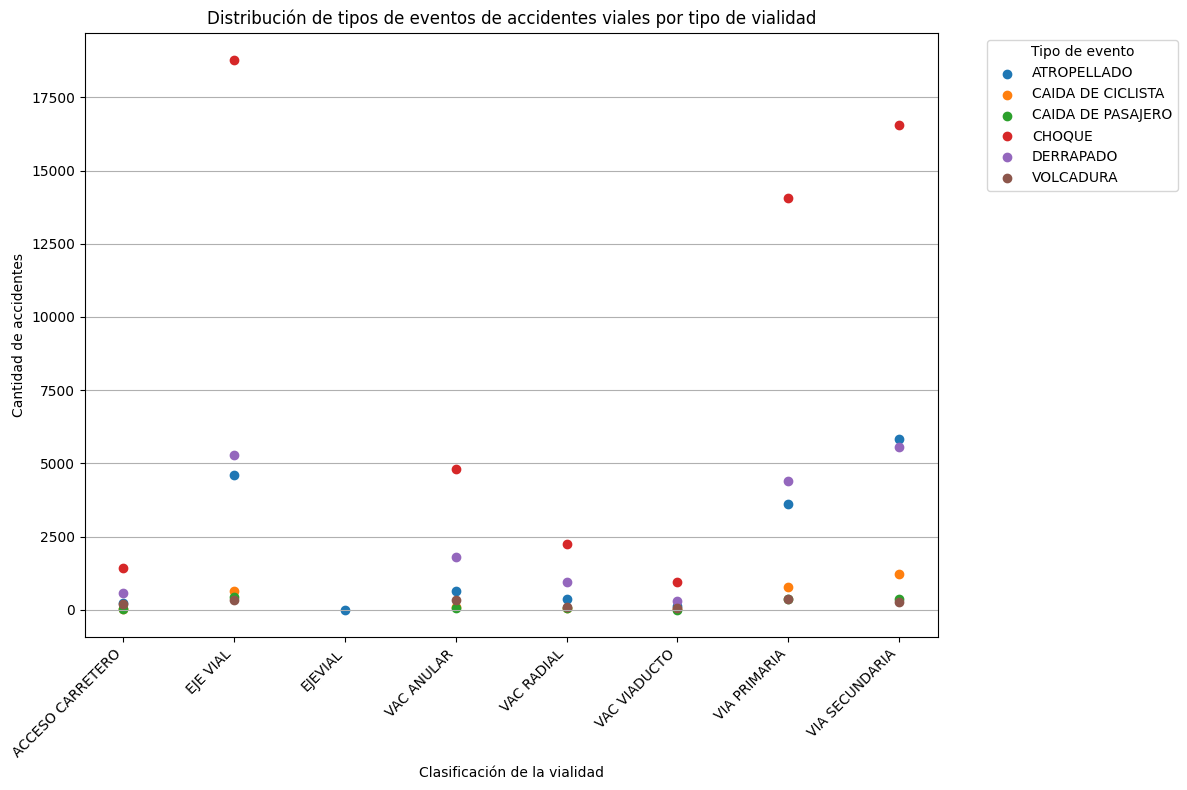

()

In [25]:
import pandas as pd
import matplotlib.pyplot as plt


data = df[['tipo_evento', 'clasificacion_de_la_vialidad']]


conteo_eventos = data.groupby(['tipo_evento', 'clasificacion_de_la_vialidad']).size().reset_index(name='count')


plt.figure(figsize=(12, 8))


for tipo_evento in conteo_eventos['tipo_evento'].unique():

    datos_tipo_evento = conteo_eventos[conteo_eventos['tipo_evento'] == tipo_evento]

    plt.scatter(datos_tipo_evento['clasificacion_de_la_vialidad'], datos_tipo_evento['count'], label=tipo_evento)


plt.title('Distribución de tipos de eventos de accidentes viales por tipo de vialidad')
plt.xlabel('Clasificación de la vialidad')
plt.ylabel('Cantidad de accidentes')
plt.legend(title='Tipo de evento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
()


In [26]:
'''Punto 1.3'''
#Bueno, después de una consulta con el profesor César y de analizar los datos, me parece que un gráfico de dispersión 
#no será posible para poder satisfacer el objetivo de buscar una relación entre el tipo de vialidad y los accidentes, dado que
#el tipo de variables que poseo son en su mayoría cualitativas.

'Punto 1.3'

In [27]:
df

,fecha_evento,hora_evento,tipo_evento,fecha_captura,folio,latitud,longitud,punto_1,punto_2,colonia,...,dia,prioridad,origen,unidad_medica_de_apoyo,matricula_unidad_medica,trasladado_lesionados,personas_fallecidas,personas_lesionadas,mes,año
0,2020-04-06,12:50:00,CHOQUE,2020-04-17,BJ/200406/03499,19.368116,-99.142903,EJE 7 SUR,ANTILLAS,PORTALES NTE,...,Lunes,BAJA,RADIO,PC,NaN,NO,0,1,4,2020
1,2020-04-06,18:31:00,CHOQUE,2020-04-17,C5/200406/05748,19.301142,-99.115521,CALZ DEL HUESO,RANCHO COLORADO,COAPA STA CECILIA,...,Lunes,BAJA,911 CDMX,ERUM,NaN,NO,0,1,4,2020
2,2020-04-06,18:39:00,CHOQUE,2020-04-17,C5/200406/05802,19.476843,-99.092207,EJE 5 NTE,AV GRAN CANAL DEL DESAGUE,JOSE MA MORELOS Y PAVON,...,Lunes,BAJA,911 CDMX,PARTICULAR,NaN,NO,0,1,4,2020
3,2020-04-06,11:38:00,DERRAPADO,2020-04-17,IZ/200406/03058,19.298474,-98.984670,EJE 10 SUR,AV SAN FCO,SAN FCO TLALTENCO,...,Lunes,MEDIA,RADIO,PC,NaN,SI,0,1,4,2020
4,2020-04-06,13:31:00,DERRAPADO,2020-04-17,C5/200406/03762,19.436170,-99.204754,AV HOMERO,SOFOCLES,LOS MORALES,...,Lunes,BAJA,911 CDMX,SEGURO,NaN,NO,0,1,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134074,2023-12-31,NaN,CHOQUE,2024-02-12,C5/20231231/04295,19.437376,-99.110431,EJE 1 NTE,ANFORA,PENITENCIARIA,...,Domingo,BAJA,RADIO,SAMU,676,NO,0,1,12,2023
134075,2023-12-31,NaN,CHOQUE,2024-02-09,C5/20231231/02787,19.399719,-99.150877,DR JOSE MA VERTIZ,ESPERANZA,NARVARTE OTE,...,Domingo,BAJA,LLAMADA DEL 911,SAMU,676,NO,0,1,12,2023
134076,2023-12-31,NaN,CHOQUE,2024-02-12,C5/20231231/01445,19.407470,-99.199970,AV CONSTITUYENTES,GRAL JOSE MA MENDIVIL,DANIEL GARZA,...,Domingo,MEDIA,LLAMADA DEL 911,PARTICULAR,PB03,SI,0,2,12,2023
134077,2023-12-31,NaN,CHOQUE,2024-02-12,C5/20231231/04116,19.439667,-99.207823,PRESA LA ANGOSTURA,PRESA COINTZIO,IRRIGACION,...,Domingo,BAJA,LLAMADA DEL 911,PC,6,NO,0,1,12,2023


In [28]:
'''Punto 2
Para responder el punto 2 es complicado, dado que solo puedo obtener una media de personas muertas y lesionados, lo que propongo entonces es 
calcular ambas medias y compararla con la media de accidentes por día'''


'Punto 2\nPara responder el punto 2 es complicado, dado que solo puedo obtener una media de personas muertas y lesionados, lo que propongo entonces es \ncalcular ambas medias y compararla con la media de accidentes por día'

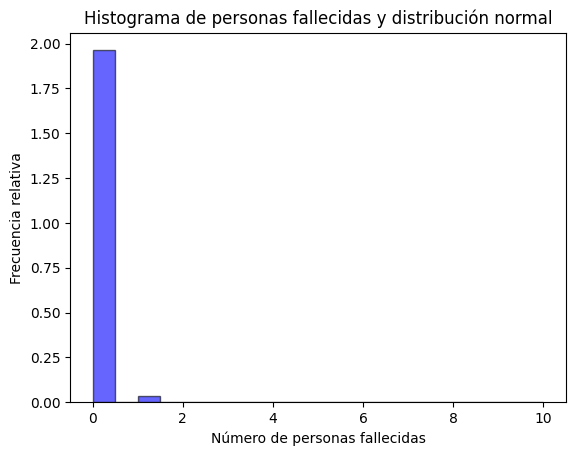

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

data = df['personas_fallecidas']


mean = np.mean(data)
std_dev = np.std(data)


plt.hist(data, bins=20, density=True, alpha=0.6, color='b', edgecolor='black')



title = "Histograma de personas fallecidas y distribución normal"
plt.title(title)
plt.xlabel('Número de personas fallecidas')
plt.ylabel('Frecuencia relativa')
plt.show()



In [32]:
import pandas as pd

# Cargar los datos


data_fallecidas = df['personas_fallecidas']
data_lesionadas = df['personas_lesionadas']

# Realizar el muestreo
sample_fallecidas = data_fallecidas.sample(n=30)
sample_lesionadas = data_lesionadas.sample(n=30)
mean_fallecidas = sample_fallecidas.mean()
mean_lesionadas = sample_lesionadas.mean()


mean_of_means = (mean_fallecidas + mean_lesionadas) / 2


overall_mean_fallecidas = data_fallecidas.mean()
overall_mean_lesionadas = data_lesionadas.mean()
from scipy.stats import t


alpha_1 = 0.05
alpha_2 = 0.01

n = 30  # Tamaño de la muestra
std_fallecidas = sample_fallecidas.std()
std_lesionadas = sample_lesionadas.std()

# Calcular los intervalos de confianza
ci_1_fallecidas = t.interval(1 - alpha_1, n - 1, loc=mean_fallecidas, scale=std_fallecidas / (n ** 0.5))
ci_2_fallecidas = t.interval(1 - alpha_2, n - 1, loc=mean_fallecidas, scale=std_fallecidas / (n ** 0.5))

ci_1_lesionadas = t.interval(1 - alpha_1, n - 1, loc=mean_lesionadas, scale=std_lesionadas / (n ** 0.5))
ci_2_lesionadas = t.interval(1 - alpha_2, n - 1, loc=mean_lesionadas, scale=std_lesionadas / (n ** 0.5))




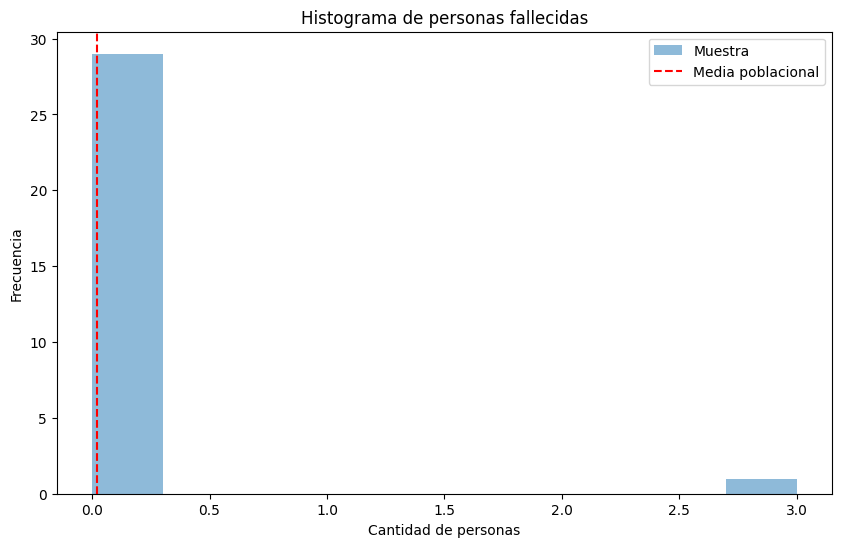

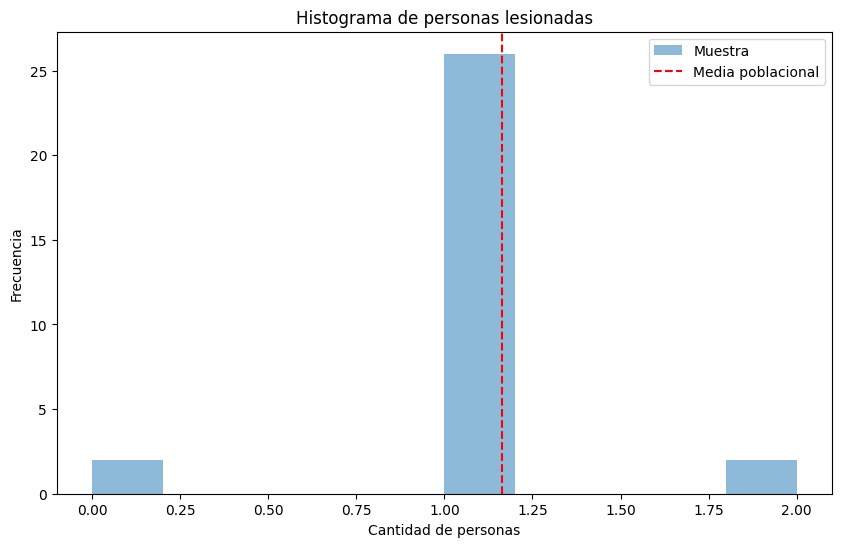

In [33]:
'''Punto 3'''
import matplotlib.pyplot as plt

# Histograma de personas fallecidas
plt.figure(figsize=(10, 6))
plt.hist(sample_fallecidas, bins=10, alpha=0.5, label='Muestra')
plt.axvline(x=overall_mean_fallecidas, color='red', linestyle='--', label='Media poblacional')
plt.title('Histograma de personas fallecidas')
plt.xlabel('Cantidad de personas')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Histograma de personas lesionadas
plt.figure(figsize=(10, 6))
plt.hist(sample_lesionadas, bins=10, alpha=0.5, label='Muestra')
plt.axvline(x=overall_mean_lesionadas, color='red', linestyle='--', label='Media poblacional')
plt.title('Histograma de personas lesionadas')
plt.xlabel('Cantidad de personas')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


In [ ]:
'''
Viendo los datos, realmente en ambos se comporta en su mayoriía como una línea vertical porque los datos están en su mayoría en ambos casos en valores entre 0 y1
lo cual no genera una campana de gauss y por lo tanto pues no se puede decir que tengan un comporamiento normal, aún con la gran cantidad de datos
En ambos casos pareciera que tuviésemos un sesgo positivo por la forma de las distribuciones'''










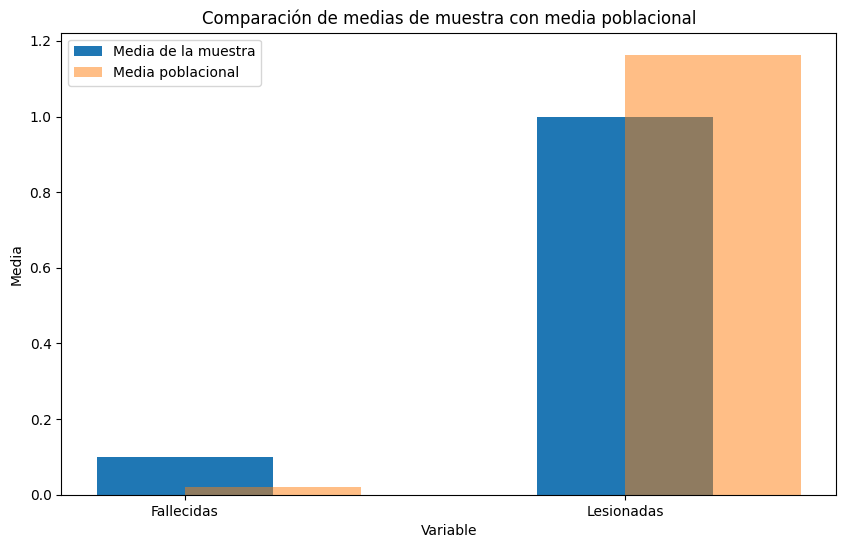

In [35]:
# Gráfico de barras de medias
labels = ['Fallecidas', 'Lesionadas']
means = [mean_fallecidas, mean_lesionadas]
overall_means = [overall_mean_fallecidas, overall_mean_lesionadas]

plt.figure(figsize=(10, 6))
x = range(len(labels))
plt.bar(x, means, width=0.4, align='center', label='Media de la muestra')
plt.bar(x, overall_means, width=0.4, align='edge', label='Media poblacional', alpha=0.5)
plt.xticks(x, labels)
plt.xlabel('Variable')
plt.ylabel('Media')
plt.title('Comparación de medias de muestra con media poblacional')
plt.legend()
plt.show()


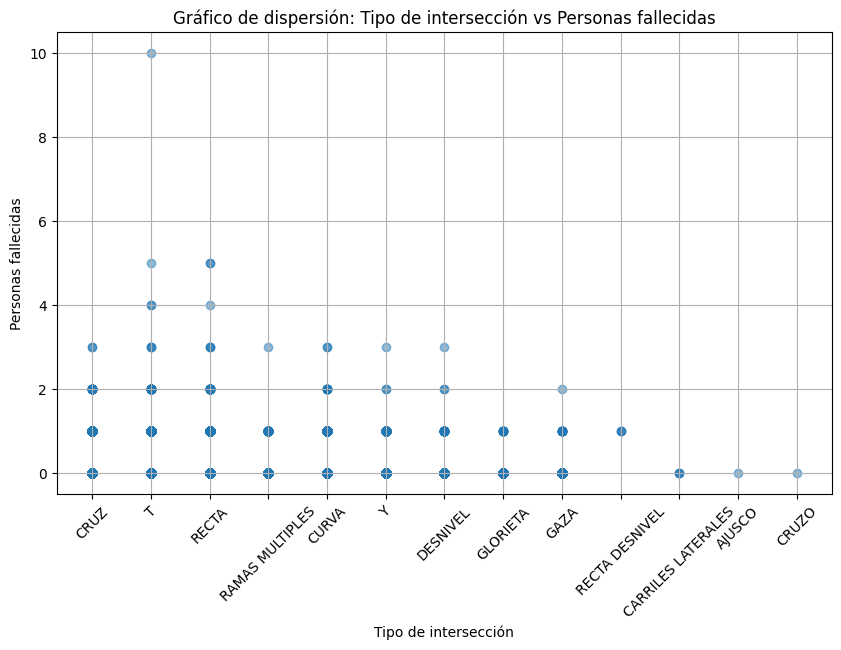

In [37]:
import matplotlib.pyplot as plt

# Gráfico de dispersión de tipo_de_interseccion vs personas_fallecidas
plt.figure(figsize=(10, 6))
plt.scatter(df['tipo_de_interseccion'], df['personas_fallecidas'], alpha=0.5)
plt.title('Gráfico de dispersión: Tipo de intersección vs Personas fallecidas')
plt.xlabel('Tipo de intersección')
plt.ylabel('Personas fallecidas')
plt.xticks(rotation=45)  # Rotamos las etiquetas del eje x para mayor legibilidad
plt.grid(True)
plt.show()


In [ ]:
#De nuevo, no puedo crear un gráfico de dispersión porque tengo una sola variable cualitativa, pero puedo ver que existe una clara
#Relación entre la cantidad de muertos y el tipo de intersección, y viendo las medias tiene sentido los valores que también están en los histogramas
#puesto que se trata de valores atípicos (Como el caso de los 10 muertos) que están lejos de la media y mediana en el muestreo.


In [ ]:
#generar datos mediante el conteo de distintas tuplas 
#Si obtengo normalidad en las que yo plantee entonces puedo plantear nuevamente los puntos 1,2,3,4 y 5
#¿Debo limitarme en los nuevos conteos que haga? COnsiderando que haga nuevamente conteos para solamente lo necesario
# debería de hacer nuevas hipótesis 